In [ ]:
# Import statements
import nltk
nltk.download("inaugural")
from nltk.corpus import inaugural
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.corpus import state_union
nltk.download("state_union")
import pandas as pd
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
import numpy as np

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Unzipping corpora/state_union.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Gathering all the stopwords, which will be taken out of corpora data,
# in order to simplify the sentiment analysis.
stop_words = str(stopwords.words("english"))
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# Subsecting the Inaugural address files to analyze aggregately — to see how sentiment changes over time.
inaugural_fileids_agg = inaugural.fileids()[39:55]
inaugural_fileids_agg

['1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1977-Carter.txt',
 '1981-Reagan.txt',
 '1985-Reagan.txt',
 '1989-Bush.txt',
 '1993-Clinton.txt',
 '1997-Clinton.txt',
 '2001-Bush.txt',
 '2005-Bush.txt']

In [ ]:
# Subsecting the State of the Union address files to analyze aggregately — to see how sentiment changes over time.
state_of_the_union_fileids_aggregate = state_union.fileids()[4:64]

print(state_of_the_union_fileids_aggregate)

['1949-Truman.txt', '1950-Truman.txt', '1951-Truman.txt', '1953-Eisenhower.txt', '1954-Eisenhower.txt', '1955-Eisenhower.txt', '1956-Eisenhower.txt', '1957-Eisenhower.txt', '1958-Eisenhower.txt', '1959-Eisenhower.txt', '1960-Eisenhower.txt', '1961-Kennedy.txt', '1962-Kennedy.txt', '1963-Johnson.txt', '1963-Kennedy.txt', '1964-Johnson.txt', '1965-Johnson-1.txt', '1965-Johnson-2.txt', '1966-Johnson.txt', '1967-Johnson.txt', '1968-Johnson.txt', '1969-Johnson.txt', '1970-Nixon.txt', '1971-Nixon.txt', '1972-Nixon.txt', '1973-Nixon.txt', '1974-Nixon.txt', '1975-Ford.txt', '1976-Ford.txt', '1977-Ford.txt', '1978-Carter.txt', '1979-Carter.txt', '1980-Carter.txt', '1981-Reagan.txt', '1982-Reagan.txt', '1983-Reagan.txt', '1984-Reagan.txt', '1985-Reagan.txt', '1986-Reagan.txt', '1987-Reagan.txt', '1988-Reagan.txt', '1989-Bush.txt', '1990-Bush.txt', '1991-Bush-1.txt', '1991-Bush-2.txt', '1992-Bush.txt', '1993-Clinton.txt', '1994-Clinton.txt', '1995-Clinton.txt', '1996-Clinton.txt', '1997-Clinton.t

In [ ]:
# A list to collect all of the words from the State of the Union addresses.
state_union_words_agg = []

# Populating the list of Statue of the Union addresses by looping through the
# the files one at a time and adding the words, so long as they are not stop words.
for fileids in state_of_the_union_fileids_aggregate:
  state_uni_file_words_agg = state_union.words(fileids)
  precursor2 = []
  for i in range(len(state_uni_file_words_agg)):
    if state_uni_file_words_agg[i].lower().isalpha() and state_uni_file_words_agg[i].lower() not in stop_words:
      precursor2.append(state_uni_file_words_agg[i].lower())
  output2 = " ".join(precursor2)
  state_union_words_agg.append(output2)

state_union_words_agg

['president harry truman annual message congress state union january mr president mr speaker members congress happy report congress state union good nation better able ever meet needs american people give fair chance pursuit happiness great republic foremost among nations world search peace last years people creating society offers new opportunities every man enjoy share good things life society conservative values principles cherish forward looking protecting values principles extending benefits rejected discredited theory fortunes nation hands privileged abandoned trickle concept national prosperity instead believe economic system rest democratic foundation wealth created benefit recent election shows people united states favor kind society want go improving american people decided poverty wasteful unnecessary preventable disease pledged common resources help one another hazards struggles individual life believe unfair prejudice artificial distinction bar citizen united states americ

In [ ]:
# Empty lists to extract the words from the State of the Union addresses,
# the years, and the president names, respectively.
inaugural_words_agg = []
inaugural_years_agg = []
inaugural_presidents_agg = []


for fileids in inaugural_fileids_agg:
  inag_file_words_agg = inaugural.words(fileids)
  # Obtaining the last 4 characters of the fileid — the year.
  inaugural_years_agg.append(int(fileids[:4]))
  # Collecting the names of the preseidents by checking the fileids against a
  # regular expression, and then getting the name by grouping the name — (\w+).
  pres = re.match(r"\d+-(\w+)\.txt", fileids)
  if pres:
    inaugural_presidents_agg.append(pres.group(1))
  # Populating the list of Inaugural address words, like shown above.
  precursor = []
  for i in range(len(inag_file_words_agg)):
    if inag_file_words_agg[i].lower().isalpha() and inag_file_words_agg[i].lower() not in stop_words:
      precursor.append(inag_file_words_agg[i].lower())
  output = " ".join(precursor)
  inaugural_words_agg.append(output)

inaugural_words_agg

['chief justice mr vice president friends understand believe agree wish form inauguration simple words brief americans today together allies passing period supreme test test courage resolve wisdom essential democracy meet test successfully honorably shall perform service historic importance men women children honor throughout time stand today taken solemn oath office presence fellow countrymen presence god know america purpose shall fail days years come shall work honorable peace durable peace today work fight total victory war achieve peace shall strive perfection shall achieve immediately still shall strive may make mistakes never mistakes result faintness heart abandonment moral principle remember old schoolmaster dr peabody said days seemed secure untroubled things life always run smoothly sometimes rising toward heights seem reverse start downward great fact remember trend civilization forever upward line drawn middle peaks valleys centuries always upward trend constitution perfec

In [ ]:
# Initializing the NLTK SentimentIntensityAnalyzer().
vader_sentiment_analyzer = SentimentIntensityAnalyzer()

# Empty lists of sentiments to be populated,
# both for the Inaugural and State of the Union Addresses.
compound_agg_inag = []
pos_agg_inag = []
neg_agg_inag = []
neu_agg_inag = []

compound_agg_state_uni = []
pos_agg_state_uni = []
neg_agg_state_uni = []
neu_agg_state_uni = []

# Looping through the words in the Inaugural and State of the Union addresses,
# and extracting the corresponding SentimentIntensityAnalyzer() value.
for text in inaugural_words_agg:
  s = vader_sentiment_analyzer.polarity_scores(text)
  compound_agg_inag.append(float(s['compound']))
  pos_agg_inag.append(float(s['pos']))
  neg_agg_inag.append(float(s['neg']))
  neu_agg_inag.append(float(s['neu']))

for text in state_union_words_agg:
  s = vader_sentiment_analyzer.polarity_scores(text)
  compound_agg_state_uni.append(float(s['compound']))
  pos_agg_state_uni.append(float(s['pos']))
  neg_agg_state_uni.append(float(s['neg']))
  neu_agg_state_uni.append(float(s['neu']))

print(compound_agg_inag)
print(pos_agg_inag)
print(neg_agg_inag)
print(neu_agg_inag)
print("\n")
print(compound_agg_state_uni)
print(pos_agg_state_uni)
print(neg_agg_state_uni)
print(neu_agg_state_uni)

[0.9983, 0.9999, 0.9999, 0.9999, 0.9988, 0.9989, 0.9998, 0.9999, 0.9997, 0.9998, 0.9999, 0.9999, 0.9993, 0.9998, 0.9997, 0.9999]
[0.379, 0.399, 0.386, 0.412, 0.29, 0.277, 0.319, 0.391, 0.419, 0.319, 0.352, 0.395, 0.274, 0.316, 0.347, 0.386]
[0.102, 0.108, 0.108, 0.103, 0.163, 0.144, 0.115, 0.086, 0.111, 0.112, 0.106, 0.052, 0.11, 0.085, 0.131, 0.113]
[0.519, 0.494, 0.506, 0.485, 0.546, 0.579, 0.566, 0.522, 0.47, 0.569, 0.542, 0.552, 0.616, 0.599, 0.522, 0.501]


[0.9999, 1.0, 0.9999, 1.0, 1.0, 1.0, 1.0, 0.9999, 1.0, 1.0, 1.0, 0.9999, 1.0, 0.9993, 0.9999, 0.9998, 0.9999, 0.9992, 0.9998, 0.9999, 0.9998, 0.9998, 0.9999, 0.9999, 0.9999, 0.9994, 0.9999, 0.9998, 0.9999, 1.0, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 1.0, 1.0, 1.0, 0.9999, 0.9999, 1.0, 1.0, 0.9999, 0.9999, 0.9994, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9938, 0.9875, 0.9852, 0.9999, 1.0]
[0.298, 0.352, 0.321, 0.286, 0.268, 0.311, 0.28, 0.306, 0.301, 0.298, 0.311, 0.253, 0.269, 0.31, 0.271, 0.278, 0.30

In [ ]:
# Formatting all the data into a Pandas DataFrame.
data_aggregate = {
    "year": inaugural_years_agg,
    "president": inaugural_presidents_agg,
    "inaugural speech": inaugural_words_agg,
    "inaugural negative sentiment": neg_agg_inag,
    "inaugural neutral sentiment": neu_agg_inag,
    "inaugural positive sentiment": pos_agg_inag,
    "inaugural compound sentiment": compound_agg_inag,
    "state of the union speech": state_union_words_agg,
    "state of the union negative sentiment": neg_agg_state_uni,
    "state of the union neutral sentiment": neu_agg_state_uni,
    "state of the union positive sentiment": pos_agg_state_uni,
    "state of the union compound sentiment": compound_agg_state_uni,
    }
df_aggregate_sentiment = pd.DataFrame.from_dict(data_aggregate, orient = "index").transpose()

In [ ]:
# Displaying some of the DataFrame, using .head().
df_aggregate_sentiment.head()

,year,president,inaugural speech,inaugural negative sentiment,inaugural neutral sentiment,inaugural positive sentiment,inaugural compound sentiment,state of the union speech,state of the union negative sentiment,state of the union neutral sentiment,state of the union positive sentiment,state of the union compound sentiment
0,1945,Roosevelt,chief justice mr vice president friends unders...,0.102,0.519,0.379,0.9983,president harry truman annual message congress...,0.079,0.622,0.298,0.9999
1,1949,Truman,mr vice president mr chief justice fellow citi...,0.108,0.494,0.399,0.9999,president harry truman annual message congress...,0.066,0.582,0.352,1.0
2,1953,Eisenhower,friends begin expression thoughts deem appropr...,0.108,0.506,0.386,0.9999,president harry truman annual message congress...,0.123,0.556,0.321,0.9999
3,1957,Eisenhower,price peace mr chairman mr vice president mr c...,0.103,0.485,0.412,0.9999,president dwight eisenhower annual message con...,0.084,0.631,0.286,1.0
4,1961,Kennedy,vice president johnson mr speaker mr chief jus...,0.163,0.546,0.29,0.9988,president dwight eisenhower annual message con...,0.069,0.663,0.268,1.0


In [ ]:
# Using .melt() to extract the relevant data to compare the negative sentiment
# of the Inaugural and State of the Union addresses.
aggregate_neg = pd.melt(
     df_aggregate_sentiment,
     id_vars = "year",
     value_vars = ["inaugural negative sentiment", "state of the union negative sentiment"],
     )
aggregate_neg.head()

,year,variable,value
0,1945,inaugural negative sentiment,0.102
1,1949,inaugural negative sentiment,0.108
2,1953,inaugural negative sentiment,0.108
3,1957,inaugural negative sentiment,0.103
4,1961,inaugural negative sentiment,0.163


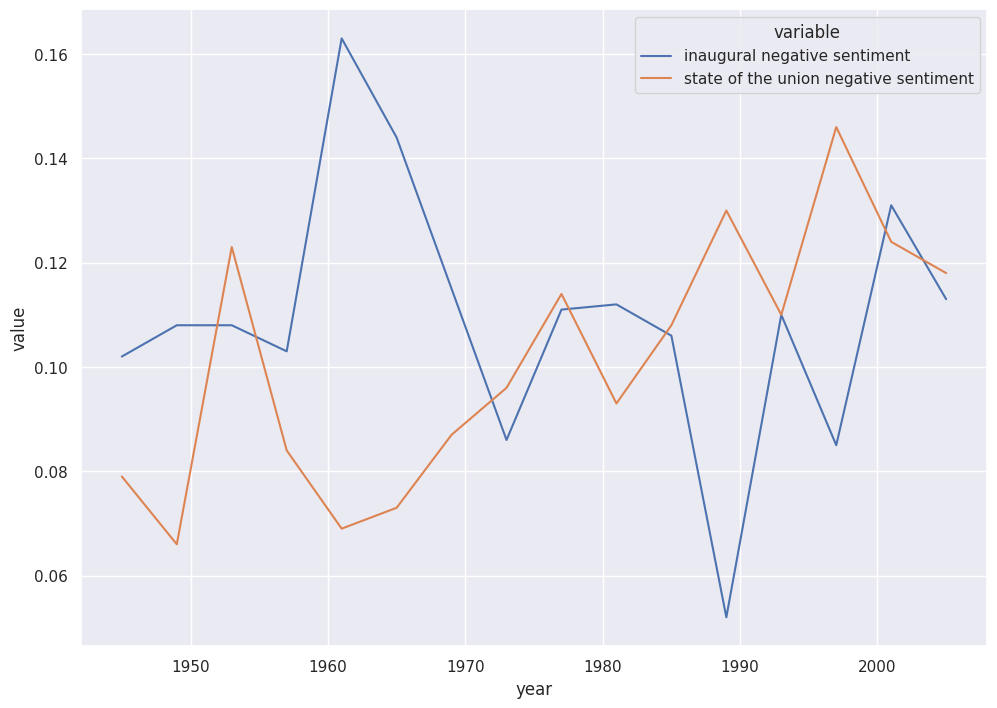

In [ ]:
# Using Seaborn to plot the negative sentiment data, using a lineplot.
sns.lineplot(
    data = aggregate_neg,
    x = "year",
    y = "value",
    hue = "variable",
).invert_yaxis()

In [ ]:
# Using .melt() to extract the relevant data to compare the neutral sentiment
# of the Inaugural and State of the Union addresses, like shown above.
aggregate_neu = pd.melt(
     df_aggregate_sentiment,
     id_vars = "year",
     value_vars = ["inaugural neutral sentiment", "state of the union neutral sentiment"],
     )
aggregate_neu.head()

,year,variable,value
0,1945,inaugural neutral sentiment,0.519
1,1949,inaugural neutral sentiment,0.494
2,1953,inaugural neutral sentiment,0.506
3,1957,inaugural neutral sentiment,0.485
4,1961,inaugural neutral sentiment,0.546


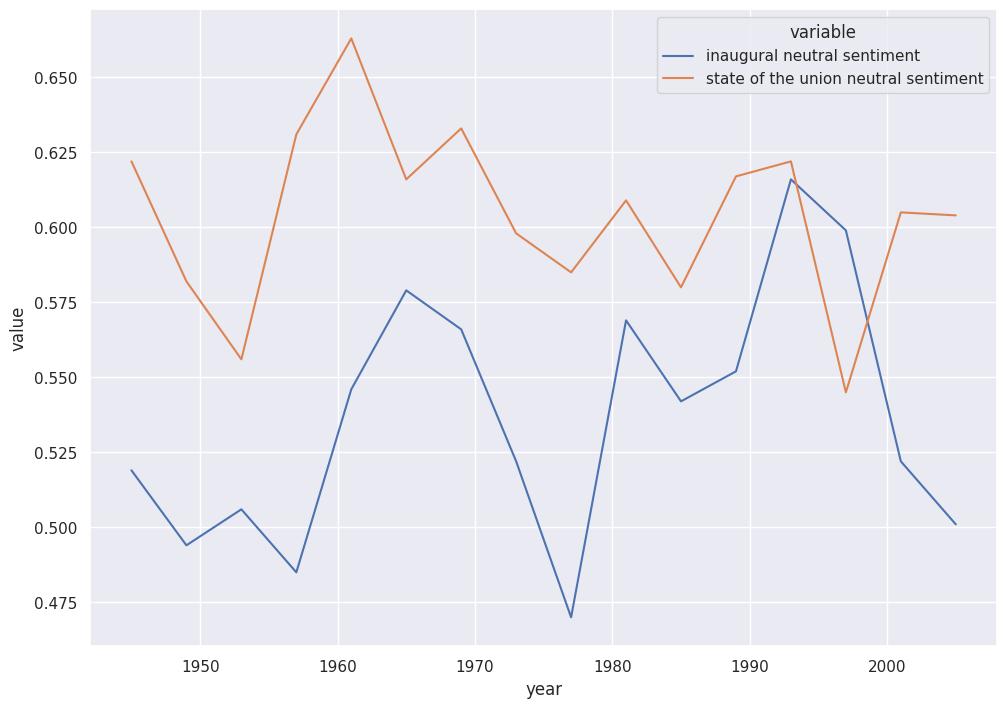

In [ ]:
# Using Seaborn to plot the neutral sentiment data, using a lineplot.
sns.lineplot(
    data = aggregate_neu,
    x = "year",
    y = "value",
    hue = "variable",
).invert_yaxis()

In [ ]:
# Using .melt() to extract the relevant data to compare the positive sentiment
# of the Inaugural and State of the Union addresses, like shown above.
aggregate_pos = pd.melt(
     df_aggregate_sentiment,
     id_vars = "year",
     value_vars = ["inaugural positive sentiment", "state of the union positive sentiment"],
     )
aggregate_pos.head()

,year,variable,value
0,1945,inaugural positive sentiment,0.379
1,1949,inaugural positive sentiment,0.399
2,1953,inaugural positive sentiment,0.386
3,1957,inaugural positive sentiment,0.412
4,1961,inaugural positive sentiment,0.29


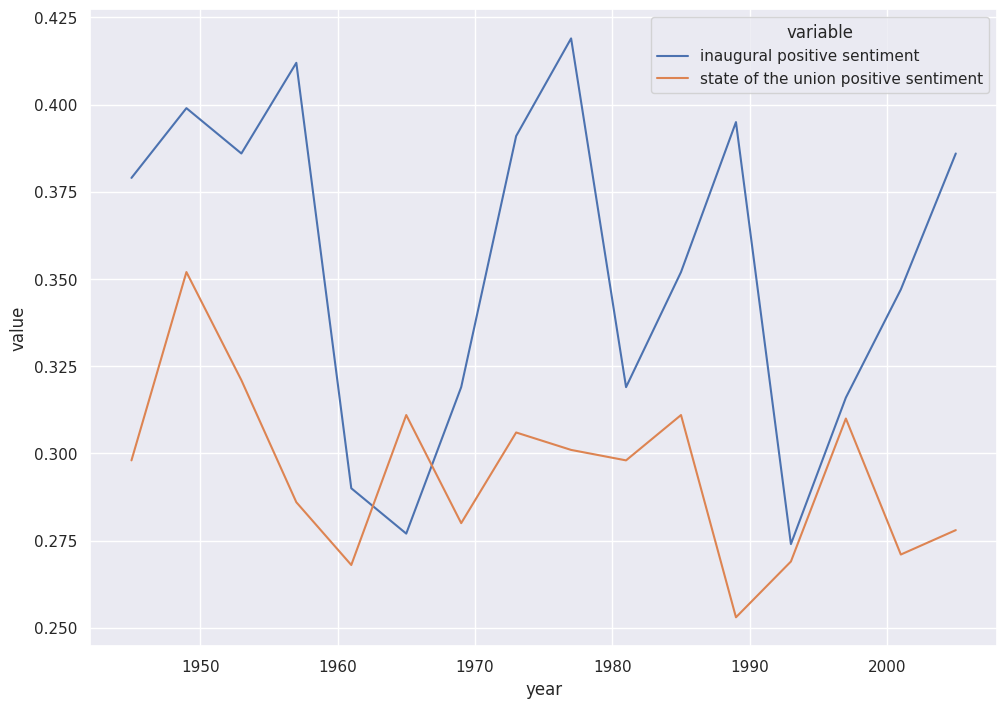

In [ ]:
# Using Seaborn to plot the positive sentiment data, using a lineplot.
sns.lineplot(
    data = aggregate_pos,
    x = "year",
    y = "value",
    hue = "variable",
).invert_yaxis()

In [ ]:
# Using .melt() to extract the relevant data to compare the compound sentiment
# of the Inaugural and State of the Union addresses, like shown above.
aggregate_compound = pd.melt(
     df_aggregate_sentiment,
     id_vars = "year",
     value_vars = ["inaugural compound sentiment", "state of the union compound sentiment"],
     )
aggregate_compound.head()

,year,variable,value
0,1945,inaugural compound sentiment,0.9983
1,1949,inaugural compound sentiment,0.9999
2,1953,inaugural compound sentiment,0.9999
3,1957,inaugural compound sentiment,0.9999
4,1961,inaugural compound sentiment,0.9988


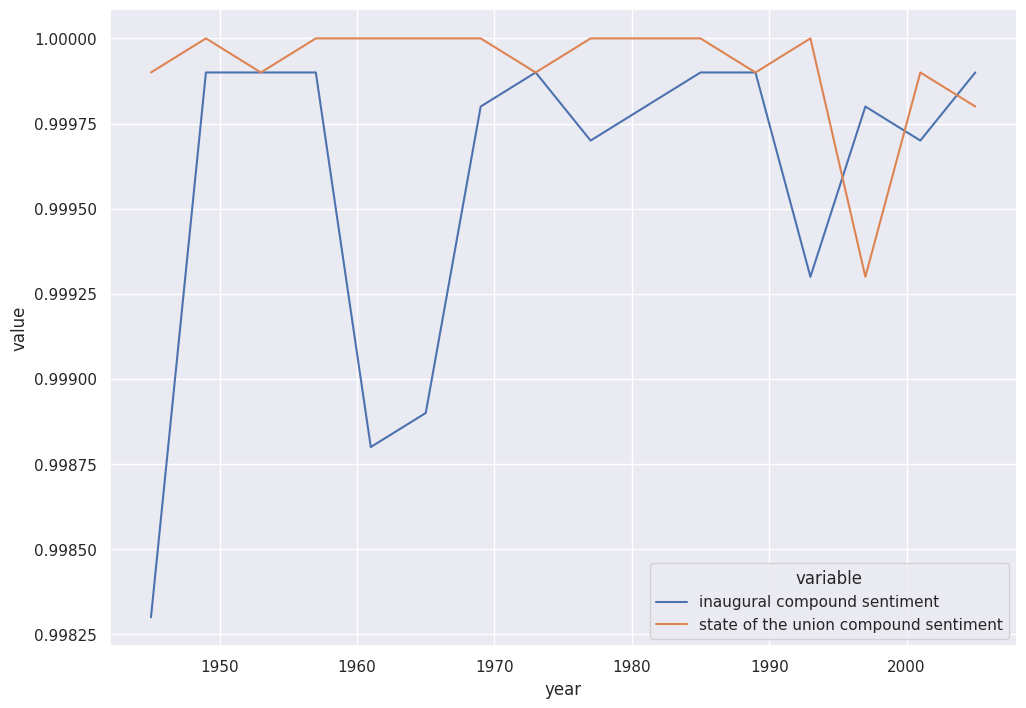

In [ ]:
# Using Seaborn to plot the compound sentiment data, using a lineplot.
sns.lineplot(
    data = aggregate_compound,
    x = "year",
    y = "value",
    hue = "variable",
).invert_yaxis()